<a href="https://colab.research.google.com/github/VoTanThinh/TUAN05/blob/main/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 [==============================] - 4s 0us/step


<function matplotlib.pyplot.show(close=None, block=None)>

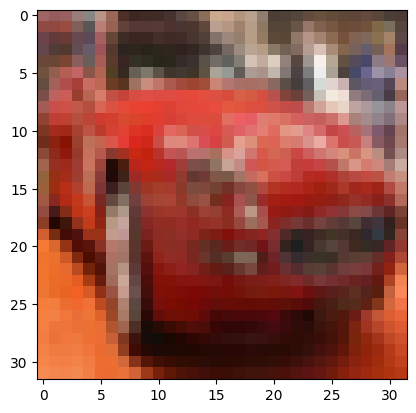

In [1]:
#CIFAR10 ẢNH 32*32 CÓ 3 KÊNH MÀU TÍN HIỆU VÀO 32*32*3
import keras
from keras.datasets import mnist
from keras.datasets import cifar10
import matplotlib.pyplot as plt
(x_train,y_train),(x_test,y_test) = keras.datasets.cifar10.load_data()
hinh = x_train[5]
plt.imshow(hinh  , cmap=plt.cm.binary)
plt.show

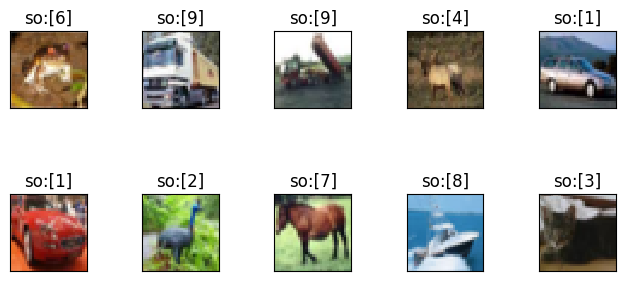

In [2]:
for i in range(10):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i],cmap='gray', interpolation='none')
  plt.title('so:{}'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [5]:
# XÂY DỰNG MÔ HÌNH
from keras.models import Sequential
from keras import models
from keras.layers import Dense 
model = Sequential()
model.add(Dense(1500, activation = 'relu', input_shape=(32*32*3,), name ='Lop1'))   # đầu ra  là 34( lớp 1)
model.add(Dense(10, activation = 'softmax')) # lớp 2  đưa về 10 số nên lớp 2 khai báo là 10
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Lop1 (Dense)                (None, 1500)              4609500   
                                                                 
 dense (Dense)               (None, 10)                15010     
                                                                 
Total params: 4,624,510
Trainable params: 4,624,510
Non-trainable params: 0
_________________________________________________________________


In [6]:
import numpy as np
x_train = x_train.reshape((50000,32*32*3)) # đầu tiên là t reset 60000 tấm ảnh và chuyển từ ảnh 2D thành ảnh 1D
x_train = x_train.astype('float32')/255        #chuyển qua mã array chuyển sang số thực           32*32*32 do 3 kênh màu
x_test = x_test.reshape((10000,32*32*3))
x_test = x_test.astype('float32')/255


In [7]:
from keras.utils import to_categorical # chuyển qua one host encording mã hóa 1 số về số 1 dùng để chuyển cho output
y_train = to_categorical(y_train,10)
y_test= to_categorical(y_test,10)

In [8]:
from keras import models
model.compile(optimizer='rmsprop', loss ='categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train,y_train, epochs=10, batch_size=128)
test_loss,test_acc = model.evaluate(x_test,y_test)
print('độ chính xác trên tập kiểm tra', test_acc)
print('hàm mất mát trên tập kiểm ta', test_loss) 

Epoch 1/10
391/391 [==============================] - 34s 85ms/step - loss: 2.4753 - accuracy: 0.2610
Epoch 2/10
391/391 [==============================] - 33s 85ms/step - loss: 1.7829 - accuracy: 0.3615
Epoch 3/10
391/391 [==============================] - 33s 84ms/step - loss: 1.6960 - accuracy: 0.3974
Epoch 4/10
391/391 [==============================] - 32s 81ms/step - loss: 1.6431 - accuracy: 0.4192
Epoch 5/10
391/391 [==============================] - 35s 89ms/step - loss: 1.5994 - accuracy: 0.4353
Epoch 6/10
391/391 [==============================] - 37s 96ms/step - loss: 1.5694 - accuracy: 0.4434
Epoch 7/10
391/391 [==============================] - 32s 81ms/step - loss: 1.5360 - accuracy: 0.4579
Epoch 8/10
391/391 [==============================] - 33s 84ms/step - loss: 1.5109 - accuracy: 0.4670
Epoch 9/10
391/391 [==============================] - 33s 85ms/step - loss: 1.4884 - accuracy: 0.4738
Epoch 10/10
313/313 [==============================] - 4s 11ms/step - loss: 1.5483